# Autoencoder for dimension reduction

When you apply encoder, the first part of an autoencoder, to your data, it reduces the dimension of the data with the pre-specifed dimension in encoder.

## Setup

In [49]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist

import numpy as np
from matplotlib import pyplot as plt

## Data

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, _), (x_test, _) = mnist.load_data()

## Preprocess

In [28]:
x_train = x_train.astype('float32')
x_train /= 255.
# np.prod works as flatten here, 28*28 to 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.astype('float32')
x_test /= 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Autoencoder

In [43]:
encoding_dim = 32
original_dim = 28 * 28

input_img = Input(shape = (original_dim, ))

encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(original_dim, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Encoder

In [44]:
encoder = Model(input_img, encoded)

## Decoder

In [45]:
encoded_input = Input(shape = (encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [46]:
autoencoder.compile(optimizer = 'adadelta',
                    loss = 'binary_crossentropy')

## Training

In [47]:
autoencoder.fit(x_train,
                x_train,
                epochs = 20,
                batch_size = 256,
                shuffle = True,
                verbose = 2,
                validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3685 - val_loss: 0.2700
Epoch 2/20
 - 2s - loss: 0.2613 - val_loss: 0.2489
Epoch 3/20
 - 2s - loss: 0.2374 - val_loss: 0.2242
Epoch 4/20
 - 2s - loss: 0.2161 - val_loss: 0.2063
Epoch 5/20
 - 2s - loss: 0.2015 - val_loss: 0.1943
Epoch 6/20
 - 3s - loss: 0.1913 - val_loss: 0.1855
Epoch 7/20
 - 4s - loss: 0.1832 - val_loss: 0.1779
Epoch 8/20
 - 4s - loss: 0.1762 - val_loss: 0.1714
Epoch 9/20
 - 4s - loss: 0.1700 - val_loss: 0.1657
Epoch 10/20
 - 3s - loss: 0.1647 - val_loss: 0.1609
Epoch 11/20
 - 3s - loss: 0.1601 - val_loss: 0.1564
Epoch 12/20
 - 3s - loss: 0.1559 - val_loss: 0.1525
Epoch 13/20
 - 3s - loss: 0.1522 - val_loss: 0.1489
Epoch 14/20
 - 3s - loss: 0.1488 - val_loss: 0.1458
Epoch 15/20
 - 3s - loss: 0.1457 - val_loss: 0.1426
Epoch 16/20
 - 3s - loss: 0.1428 - val_loss: 0.1398
Epoch 17/20
 - 3s - loss: 0.1401 - val_loss: 0.1374
Epoch 18/20
 - 4s - loss: 0.1376 - val_loss: 0.1349
Epoch 19/20
 - 3s - los

## Encoded images and Reconstructed images

In [36]:
# Encoded images
encoded_imgs = encoder.predict(x_test)

# Reconstructed images
decoded_imgs = decoder.predict(encoded_imgs)

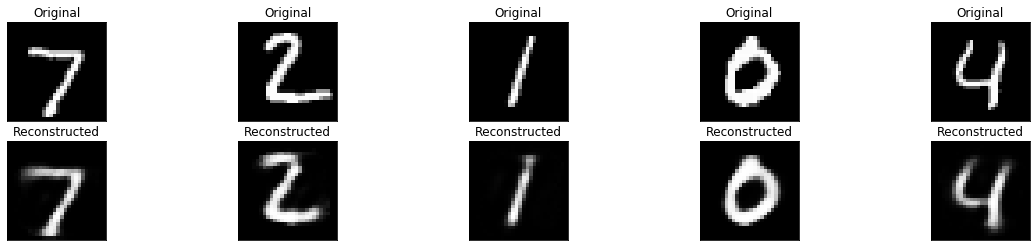

In [40]:
n = 5

plt.figure(figsize = (20, 4))

for i in range(n):
    
    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Dimension reduction

In [62]:
# encoder produces dimension reduced output
encoded_imgs = encoder.predict(x_train)
encoded_imgs.shape

(60000, 32)

## Model

In [63]:
model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = (encoding_dim,)))
model.add(Dense(10, activation = 'sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                130       
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [65]:
history = model.fit(encoded_imgs,
                    y_train,
                    epochs = 10,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/sample - loss: 1.1504 - acc: 0.5440 - val_loss: 0.5322 - val_acc: 0.8380
Epoch 2/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.5083 - acc: 0.8411 - val_loss: 0.4355 - val_acc: 0.8673
Epoch 3/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.4439 - acc: 0.8633 - val_loss: 0.4074 - val_acc: 0.8737
Epoch 4/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.4105 - acc: 0.8729 - val_loss: 0.3737 - val_acc: 0.8837
Epoch 5/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3909 - acc: 0.8805 - val_loss: 0.3623 - val_acc: 0.8915
Epoch 6/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3763 - acc: 0.8860 - val_loss: 0.3486 - val_acc: 0.8940
Epoch 7/10
48000/48000 [==============================] - 2s 52us/sample - loss: 0.3659 - acc: 0.8899 - val_loss: 0.

## Evaluation

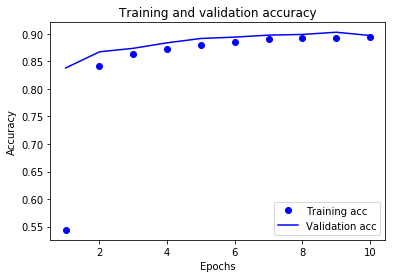

In [67]:
plt.clf()

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label = "Training acc")
plt.plot(epochs, val_acc_values, 'b', label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## Prediction

In [69]:
encoded_imgs = encoder.predict(x_test)
test_loss, test_acc = model.evaluate(encoded_imgs,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

 - 0s - loss: 0.3429 - acc: 0.8942

Test accuracy: 0.8942
